# Employee Attrition Prediction

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import f_regression, f_classif, mutual_info_regression, SelectKBest
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import re
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
from scipy.stats import uniform, randint
import joblib
import os
import json
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from scipy.stats import kendalltau


---
## 1. Data Preparation and Exploration
---

In [60]:
Train_Data = pd.read_csv('aug_train.csv')
Test_Data = pd.read_csv('aug_test.csv')
sample_submission_Data = pd.read_csv('sample_submission.csv')


In [61]:
print("Rows count in Train Data: ", Train_Data.shape[0])

print("\n\n\nTrain Data Head: \n")
print(Train_Data.head())

print("\n\n\nTrain Data Info: \n")
print(Train_Data.info())

print("\n\nMissing values:\n" )
print(Train_Data.isnull().sum())

print("\n\nTrain Data Description: \n")
print(Train_Data.describe())

Rows count in Train Data:  19158



Train Data Head: 

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99 

In [62]:
print("Rows count in Test Data: ", Test_Data.shape[0])

print("\n\n Test Data Info: \n")
print(Test_Data.info())

print("\n\nMissing values:\n" )
print(Test_Data.isnull().sum())

print("\n\n Test Data Description: \n")
print(Test_Data.describe())

Rows count in Test Data:  2129


 Test Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memor

In [63]:
print("Rows count in Sample Data: ", sample_submission_Data.shape[0])

print("\n\n\n Sample Data Info: \n")
print(sample_submission_Data.info())

print("\n\n Missing values:\n" )
print(sample_submission_Data.isnull().sum())

print("\n\n Sample Data Description: \n")
print(sample_submission_Data.describe())

Rows count in Sample Data:  2129



 Sample Data Info: 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   enrollee_id  2129 non-null   int64  
 1   target       2129 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 33.4 KB
None


 Missing values:

enrollee_id    0
target         0
dtype: int64


 Sample Data Description: 

        enrollee_id  target
count   2129.000000  2129.0
mean   16861.614843     0.5
std     9576.846029     0.0
min        3.000000     0.5
25%     8562.000000     0.5
50%    16816.000000     0.5
75%    25129.000000     0.5
max    33353.000000     0.5


In [64]:
Train_Data['gender'].value_counts()

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

In [65]:
Train_Data['gender'] = Train_Data['gender'].fillna("Unknown")

In [66]:
Train_Data['gender'].value_counts()

gender
Male       13221
Unknown     4508
Female      1238
Other        191
Name: count, dtype: int64

In [67]:
Train_Data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [68]:
Train_Data['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [69]:
Train_Data['enrolled_university'] = Train_Data['enrolled_university'].fillna(Train_Data['enrolled_university'].mode()[0])

In [70]:
Train_Data['enrolled_university'].value_counts()

enrolled_university
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [71]:
Train_Data['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [72]:
def fill_education_level(row):
    if pd.isna(row['education_level']):
        if row['enrolled_university'] in ['Full time course', 'Part time course']:
            return 'Graduate'  # Assume enrolled students are likely graduates
        else:
            return 'High School'  # Default to 'High School' for non-enrolled
    return row['education_level']

Train_Data['education_level'] = Train_Data.apply(fill_education_level, axis=1)

In [73]:
Train_Data['education_level'].value_counts()

education_level
Graduate          11688
Masters            4361
High School        2387
Phd                 414
Primary School      308
Name: count, dtype: int64

In [74]:
Train_Data['major_discipline'].value_counts()

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [75]:
Train_Data['major_discipline'] = Train_Data['major_discipline'].fillna('No Major')
#Train_Data['major_discipline'] = Train_Data['major_discipline'].fillna('Other')

In [76]:
Train_Data['major_discipline'].value_counts()

major_discipline
STEM               14492
No Major            3036
Humanities           669
Other                381
Business Degree      327
Arts                 253
Name: count, dtype: int64

In [77]:
Train_Data['experience'].value_counts()

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [78]:
#Train_Data['experience'] = Train_Data['experience'].fillna(Train_Data['experience'].mode()[0])
def convert_experience(exp):
    if pd.isna(exp):
        return 21  # Mode was ">20", so use 21 for consistency
    elif exp == '>20':
        return 21
    elif exp == '<1':
        return 0.5
    else:
        return int(exp)

Train_Data['experience'] = Train_Data['experience'].apply(convert_experience)

In [79]:
Train_Data['experience'].value_counts()

experience
21.0    3351
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
1.0      549
0.5      522
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: count, dtype: int64

In [80]:
Train_Data['company_size'].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [81]:
Train_Data['company_size'] = Train_Data['company_size'].fillna(Train_Data['company_size'].mode()[0])

In [82]:
Train_Data['company_size'].value_counts()

company_size
50-99        9021
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [83]:
Train_Data['company_type'].value_counts()

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

In [84]:
Train_Data['company_type'] = Train_Data['company_type'].fillna(Train_Data['company_type'].mode()[0])

In [85]:
Train_Data['company_type'].value_counts()

company_type
Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: count, dtype: int64

In [86]:
Train_Data['last_new_job'].value_counts()

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [87]:
Train_Data['last_new_job'] = Train_Data['last_new_job'].fillna(Train_Data['last_new_job'].mode()[0])

In [88]:
Train_Data['last_new_job'].value_counts()

last_new_job
1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [89]:
Train_Data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

---
## 3. Exploratory Data Analysis For Train Data
---

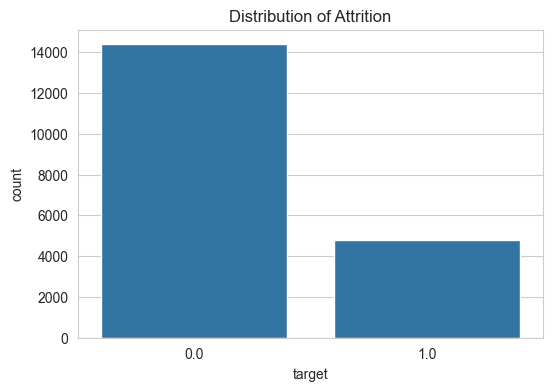

In [90]:
plt.figure(figsize=(6, 4))
sns.countplot(data=Train_Data, x='target')  
plt.title('Distribution of Attrition')
plt.show()

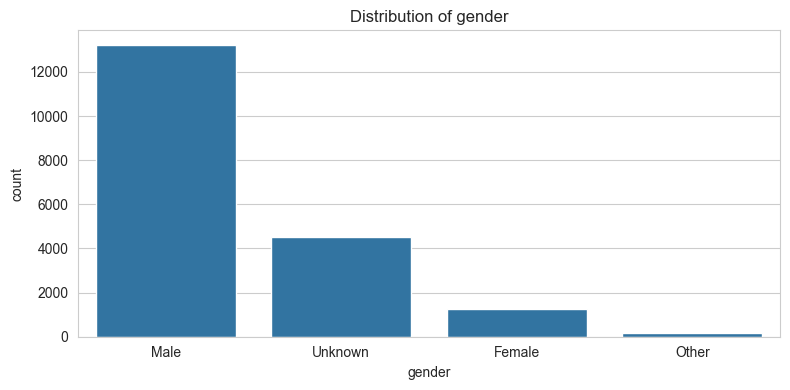

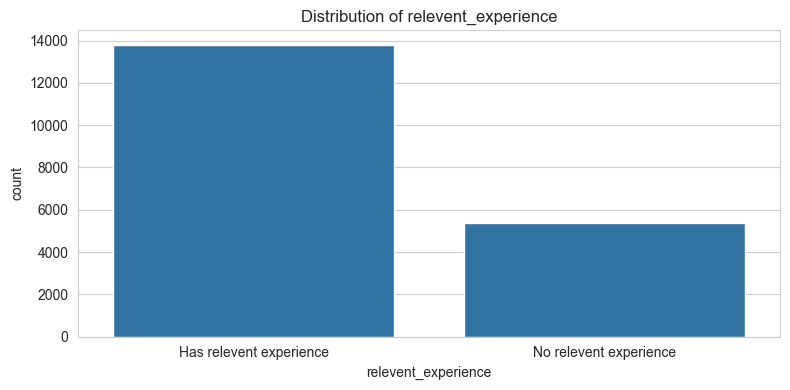

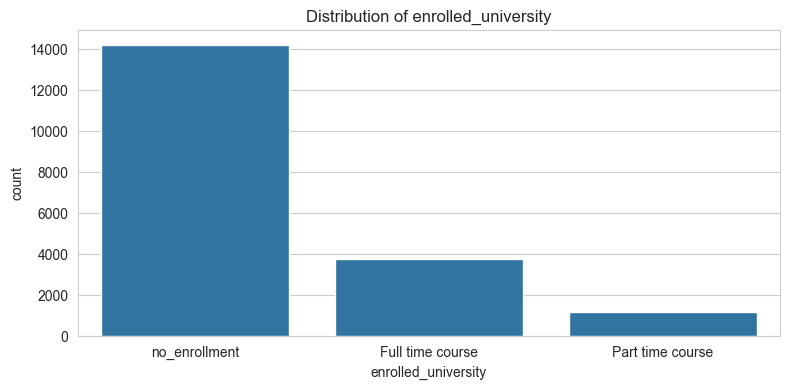

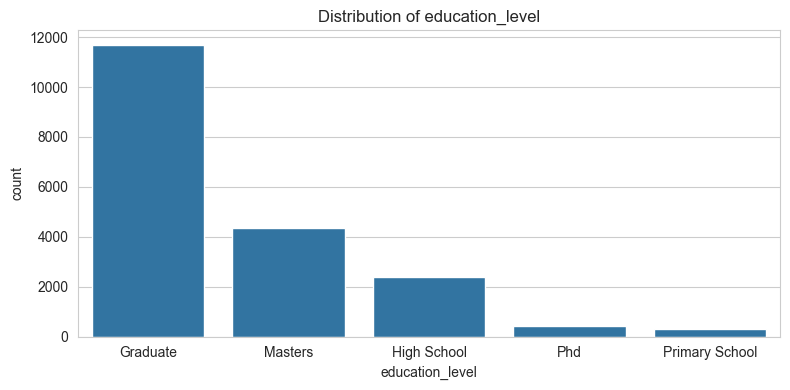

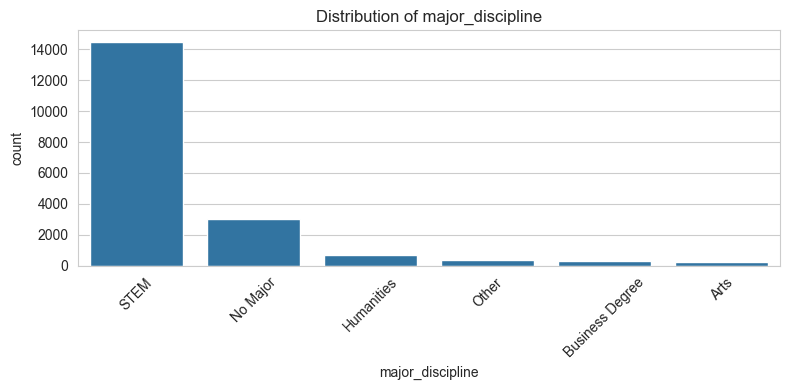

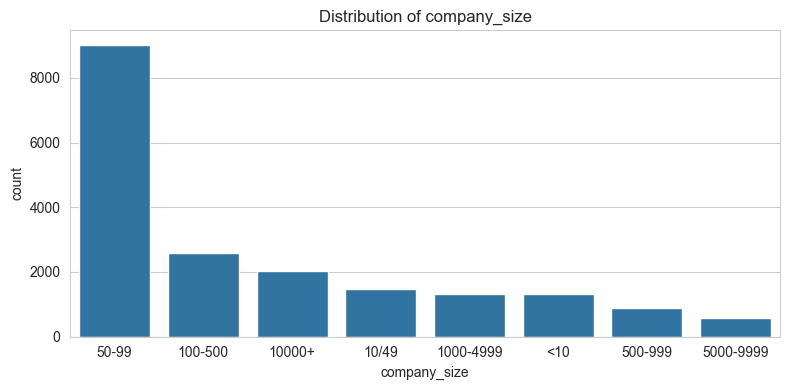

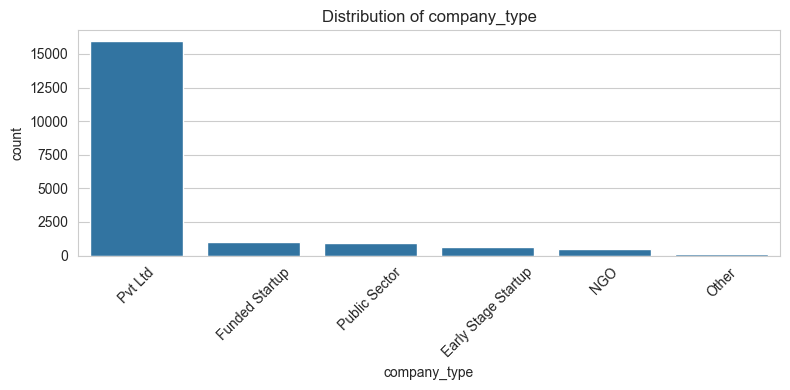

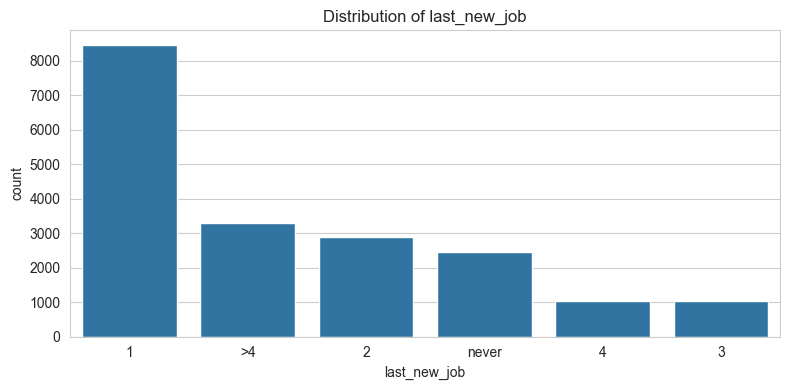

In [91]:
sns.set_style("whitegrid")

# 1. Categorical Variables - Count Plots
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university', 
                   'education_level', 'major_discipline', 'company_size', 
                   'company_type', 'last_new_job']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=Train_Data, x=col, order=Train_Data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45 if col in ['company_type', 'major_discipline'] else 0)
    plt.tight_layout()
    plt.show()

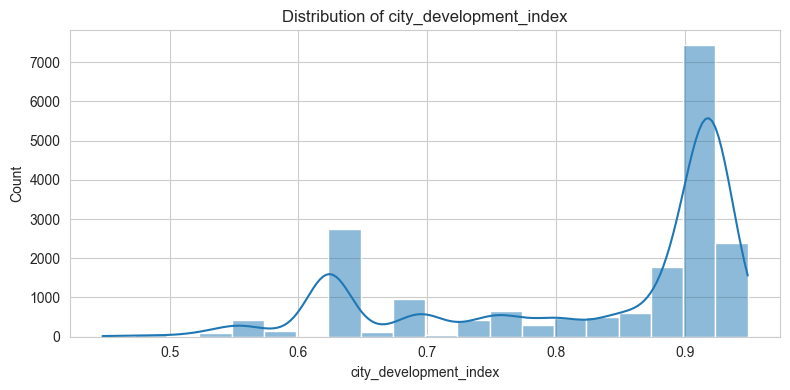

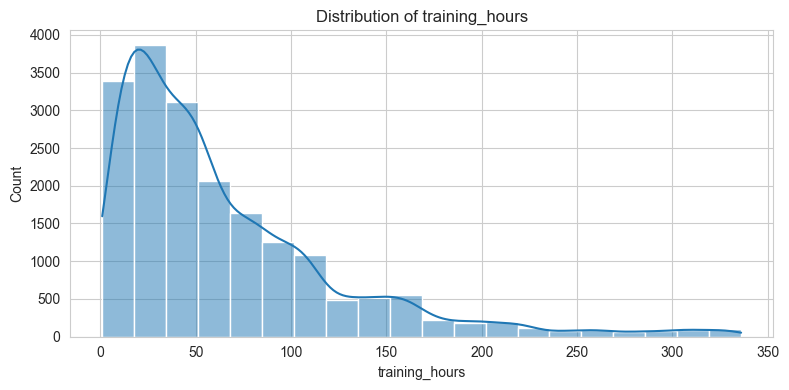

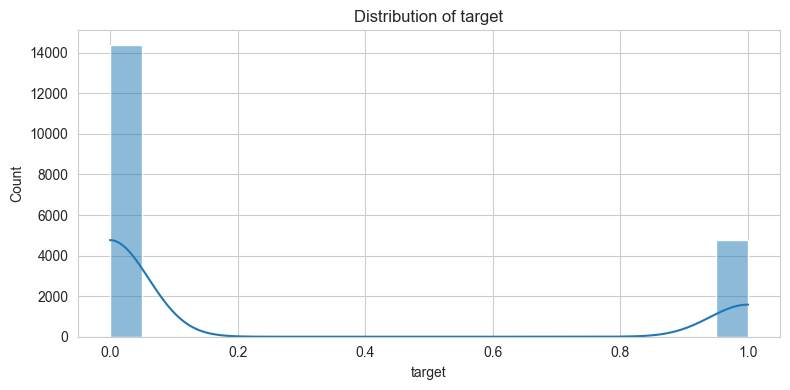

In [92]:
numerical_cols = ['city_development_index', 'training_hours', 'target']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=Train_Data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

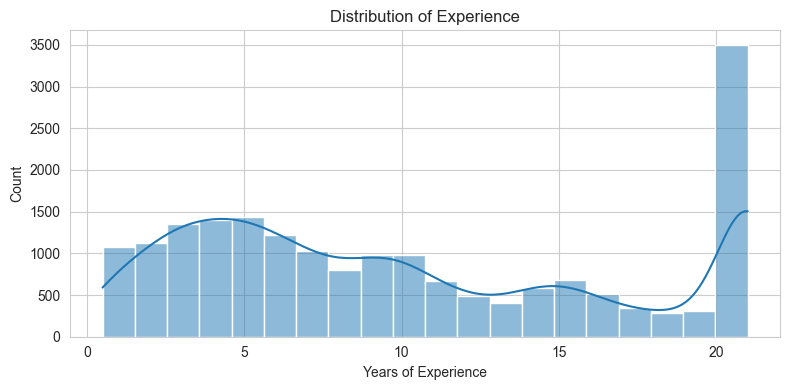

In [93]:
plt.figure(figsize=(8, 4))
sns.histplot(Train_Data['experience'], bins=20, kde=True)
plt.title('Distribution of Experience')
plt.xlabel('Years of Experience')
plt.tight_layout()
plt.show()

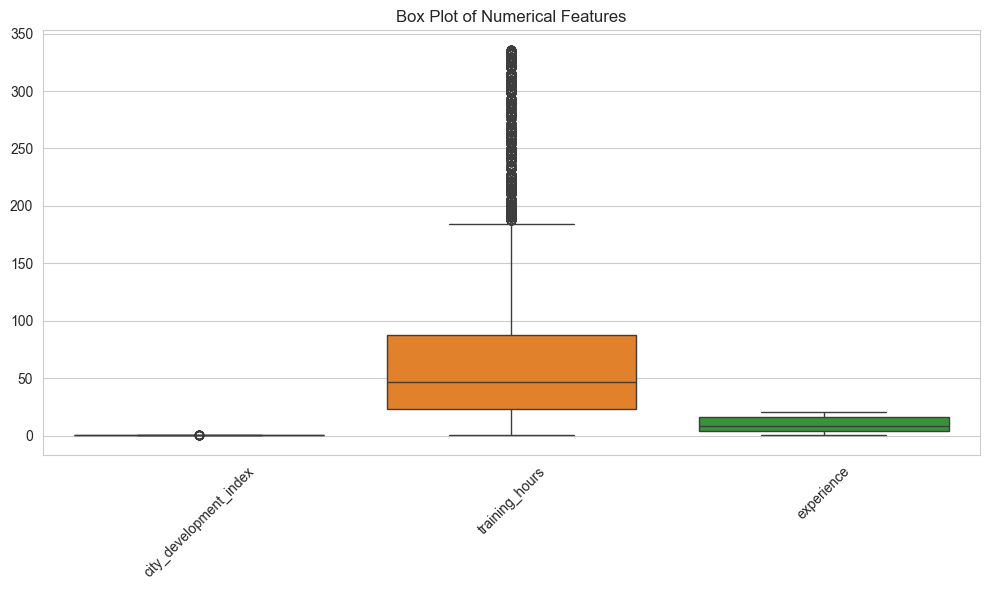

In [94]:
numerical_cols = ['city_development_index', 'training_hours', 'experience']  # update to include 'experience'

plt.figure(figsize=(10, 6))
sns.boxplot(data=Train_Data[numerical_cols])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
Train_Data['cdi_experience'] = Train_Data['city_development_index'] * Train_Data['experience']

In [96]:
from sklearn.preprocessing import LabelEncoder

# Encode 'city' by extracting the number after the underscore
Train_Data['city_num'] = Train_Data['city'].str.extract(r'_(\d+)', expand=False).astype(float)

# List of categorical columns to label encode (excluding 'city')
cat_cols = [
    'gender', 'relevent_experience', 'enrolled_university',
    'education_level', 'major_discipline', 'company_size',
    'company_type', 'last_new_job'
]

# Label encode each categorical column
le = LabelEncoder()
for col in cat_cols:
    Train_Data[col] = le.fit_transform(Train_Data[col].astype(str))

# Drop the original 'city' column
Train_Data = Train_Data.drop(columns=['city'])

# Update numerical columns to include 'city_num'
numerical_cols = ['city_development_index', 'training_hours', 'experience', 'cdi_experience', 'city_num']

# Scale numerical columns
scaler = StandardScaler()
Train_Data[numerical_cols] = scaler.fit_transform(Train_Data[numerical_cols])

In [97]:
Train_Data['training_hours_bin'] = pd.qcut(Train_Data['training_hours'], q=3, labels=['Low', 'Medium', 'High'])
Train_Data = pd.get_dummies(Train_Data, columns=['training_hours_bin'], drop_first=True)

In [98]:
Train_Data.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,cdi_experience,city_num,training_hours_bin_Medium,training_hours_bin_High
0,8949,0.738919,1,0,2,0,5,1.601342,4,5,0,-0.488985,1.0,1.712012,0.492781,True,False
1,29725,-0.428410,1,1,2,0,5,0.715746,4,5,4,-0.305825,0.0,0.475332,-0.864616,True,False
2,11561,-1.660590,3,1,0,0,5,-0.760247,4,5,5,0.293607,0.0,-0.896609,-1.273990,False,True
3,33241,-0.323026,3,1,2,0,1,-1.424443,4,5,5,-0.222571,1.0,-1.335485,0.751333,True,False
4,666,-0.501368,1,0,2,2,5,1.601342,4,1,3,-0.955209,0.0,1.194635,1.763994,False,False


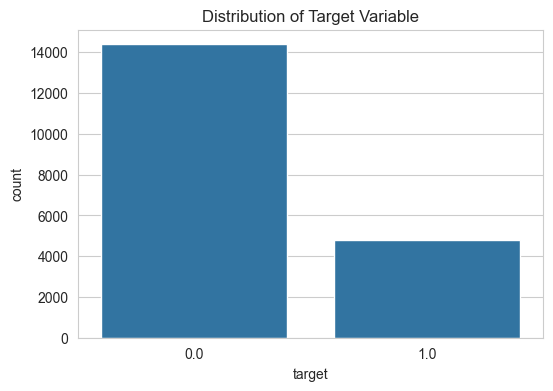

Target Distribution:
 target
0.0    0.750652
1.0    0.249348
Name: proportion, dtype: float64


In [99]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=Train_Data)
plt.title('Distribution of Target Variable')
plt.show()
print("Target Distribution:\n", Train_Data['target'].value_counts(normalize=True))

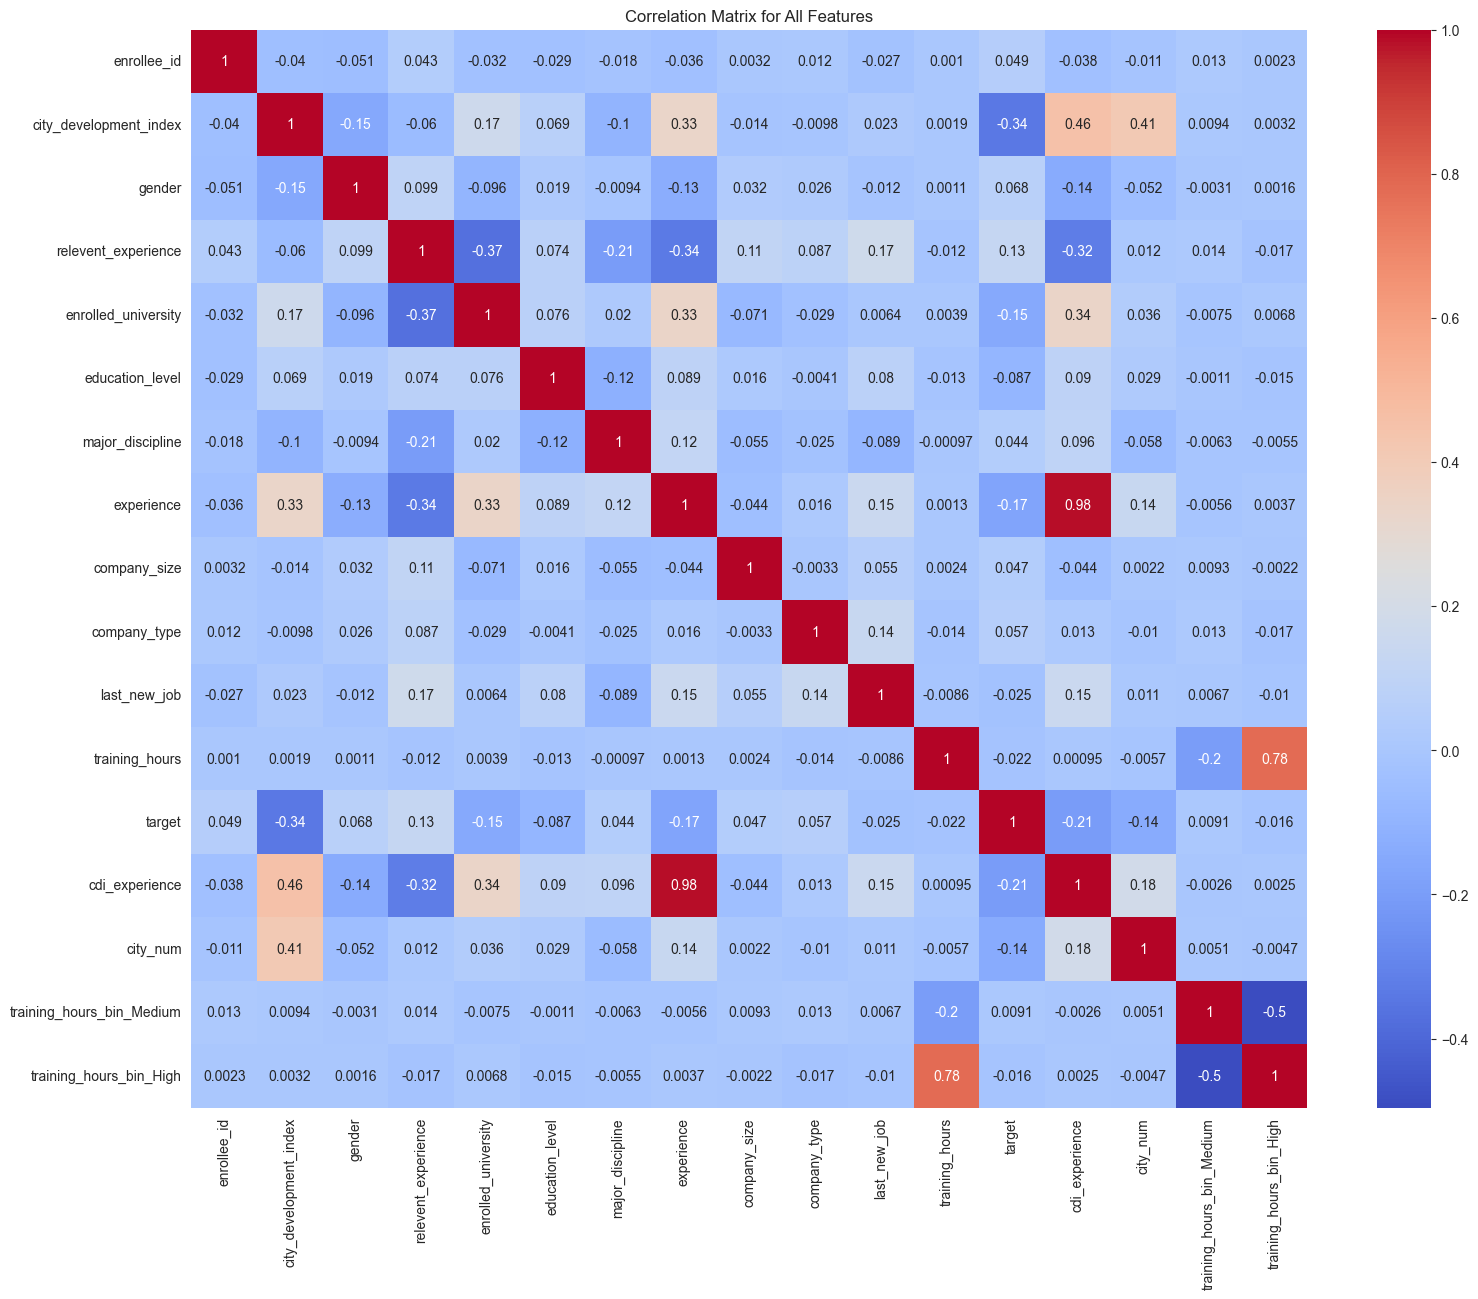

In [100]:
plt.figure(figsize=(18, 14))
sns.heatmap(Train_Data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for All Features')
plt.show()

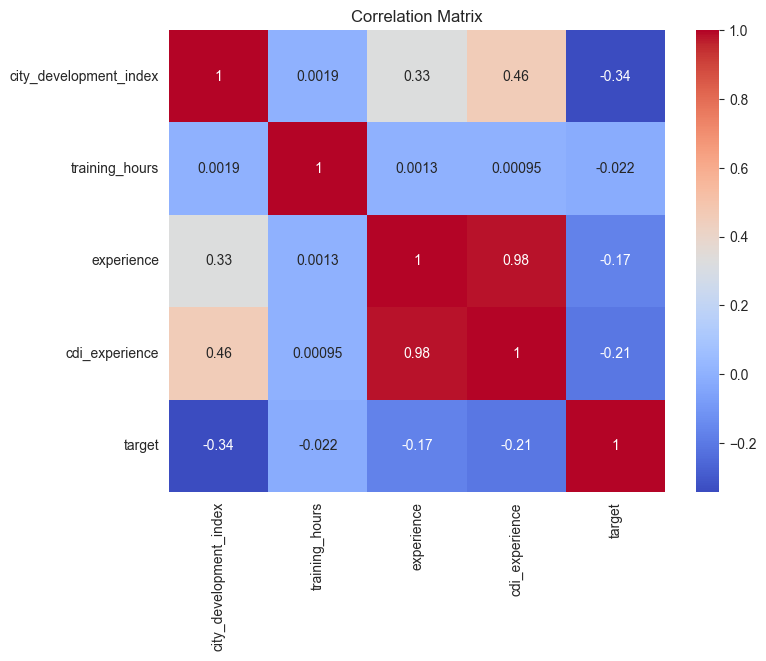

In [101]:
numerical_cols = ['city_development_index', 'training_hours', 'experience', 'cdi_experience']

plt.figure(figsize=(8, 6))
sns.heatmap(Train_Data[numerical_cols + ['target']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

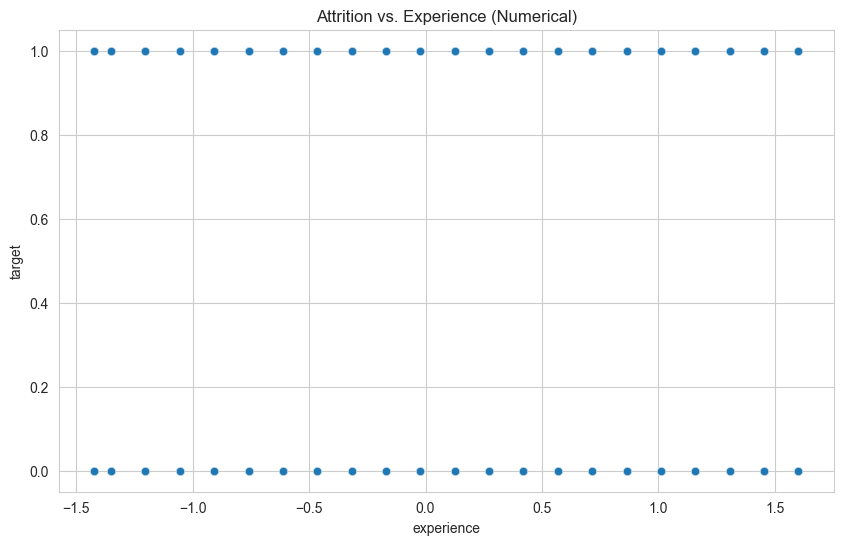

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='experience', y='target', data=Train_Data, alpha=0.5)
plt.title('Attrition vs. Experience (Numerical)')
plt.show()

In [103]:
Train_Data['training_hours'] = Train_Data['training_hours'].clip(upper=Train_Data['training_hours'].quantile(0.99))

In [104]:
X = Train_Data.drop(['enrollee_id', 'target'], axis=1)
y = Train_Data['target']

In [105]:
numerical_cols = ['city_development_index', 'training_hours', 'experience', 'cdi_experience']
# Define categorical columns (the ones you label encoded)
categorical_cols = [
    'gender', 'relevent_experience', 'enrolled_university',
    'education_level', 'major_discipline', 'company_size',
    'company_type', 'last_new_job'
]
X_cat = Train_Data[categorical_cols]
X_num = Train_Data[numerical_cols]
X_cat = Train_Data[categorical_cols]
y = Train_Data['target']

# 1. ANOVA F-test for numerical features
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X_num, y)
anova_scores = pd.Series(anova_selector.scores_, index=numerical_cols)
print("ANOVA F-test scores:\n", anova_scores.sort_values(ascending=False))

# 2. Kendall's Tau for numerical features
kendall_scores = {}
for col in numerical_cols:
    tau, _ = kendalltau(Train_Data[col], y)
    kendall_scores[col] = abs(tau)
kendall_scores = pd.Series(kendall_scores)
print("\nKendall's Tau scores:\n", kendall_scores.sort_values(ascending=False))

# 3. Chi-squared for categorical features
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_cat, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=categorical_cols)
print("\nChi-squared scores:\n", chi2_scores.sort_values(ascending=False))

# 4. Mutual Information for categorical features
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X_cat, y)
mi_scores = pd.Series(mi_selector.scores_, index=categorical_cols)
print("\nMutual Information scores:\n", mi_scores.sort_values(ascending=False))

ANOVA F-test scores:
 city_development_index    2531.716218
cdi_experience             858.043198
experience                 596.769570
training_hours               8.810506
dtype: float64

Kendall's Tau scores:
 city_development_index    0.238835
cdi_experience            0.183460
experience                0.153235
training_hours            0.011582
dtype: float64

Chi-squared scores:
 relevent_experience    227.490477
education_level        199.895182
enrolled_university    177.481258
gender                  52.225615
company_size            40.744707
last_new_job            25.669298
company_type            23.065531
major_discipline        10.547172
dtype: float64

Mutual Information scores:
 company_size           0.016127
enrolled_university    0.008844
relevent_experience    0.006832
gender                 0.005401
last_new_job           0.004186
major_discipline       0.002209
education_level        0.001735
company_type           0.000193
dtype: float64


In [106]:
# Dynamically select top N features from previous feature selection results

# Set how many top features you want to use
N_TOP_FEATURES = 12  # Change this number as needed

# Combine all feature importance scores into one DataFrame
feature_scores = pd.DataFrame({
    'anova': anova_scores,
    'kendall': kendall_scores,
    'chi2': chi2_scores,
    'mutual_info': mi_scores
})

# Normalize scores for fair comparison (optional but recommended)
feature_scores_norm = feature_scores.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Sum normalized scores (or use another aggregation method)
feature_scores_norm['total'] = feature_scores_norm.sum(axis=1)

# Get the top N features by total score
best_features = feature_scores_norm['total'].sort_values(ascending=False).head(N_TOP_FEATURES).index.tolist()

# Use only the best features for X
X = Train_Data[best_features]

In [107]:
X.columns

Index(['city_development_index', 'relevent_experience', 'enrolled_university',
       'company_size', 'cdi_experience', 'education_level', 'experience',
       'gender', 'last_new_job', 'major_discipline', 'company_type',
       'training_hours'],
      dtype='object')

In [108]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [109]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify class balance after SMOTE
print("Class Distribution Before SMOTE:\n", y_train.value_counts(normalize=True))
print("Class Distribution After SMOTE:\n", pd.Series(y_train_res).value_counts(normalize=True))

Class Distribution Before SMOTE:
 target
0.0    0.75062
1.0    0.24938
Name: proportion, dtype: float64
Class Distribution After SMOTE:
 target
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


Accuracy: 0.7700939457202505
ROC AUC: 0.7766175863091825
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      2877
         1.0       0.55      0.41      0.47       955

    accuracy                           0.77      3832
   macro avg       0.69      0.65      0.66      3832
weighted avg       0.75      0.77      0.76      3832

Confusion Matrix:
 [[2559  318]
 [ 563  392]]


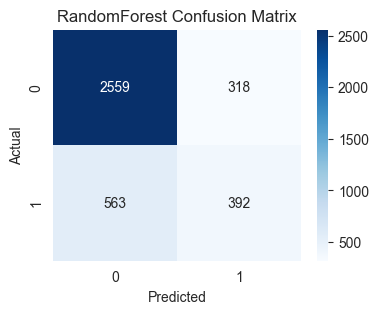

In [110]:
from sklearn.metrics import confusion_matrix

# Train and evaluate RandomForest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# Print metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_pred_proba))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Print and plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save results for comparison
results = {}
results['RandomForest'] = {
    'accuracy': accuracy_score(y_val, y_pred),
    'roc_auc': roc_auc_score(y_val, y_pred_proba),
    'classification_report': classification_report(y_val, y_pred, output_dict=True),
    'confusion_matrix': cm
}

XGBoost Accuracy: 0.7779227557411273
XGBoost ROC AUC: 0.7873228184536322
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2877
         1.0       0.57      0.45      0.50       955

    accuracy                           0.78      3832
   macro avg       0.70      0.67      0.68      3832
weighted avg       0.76      0.78      0.77      3832

XGBoost Confusion Matrix:
 [[2550  327]
 [ 524  431]]


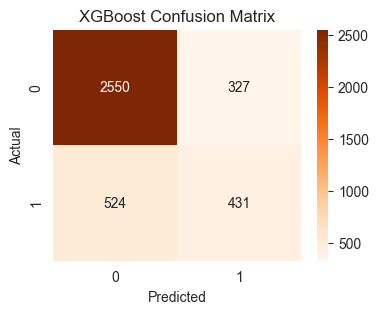

In [117]:
from xgboost import XGBClassifier

# Train and evaluate XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
y_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Print metrics
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_val, y_pred_proba_xgb))
print("XGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))

# Print and plot confusion matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
print("XGBoost Confusion Matrix:\n", cm_xgb)
plt.figure(figsize=(4,3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

joblib.dump(xgb_model, 'pkl_models/xgboost_model.pkl')
# Save results for comparison
results['XGBoost'] = {
    'accuracy': accuracy_score(y_val, y_pred_xgb),
    'roc_auc': roc_auc_score(y_val, y_pred_proba_xgb),
    'classification_report': classification_report(y_val, y_pred_xgb, output_dict=True),
    'confusion_matrix': cm_xgb
}

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Number of positive: 3822, number of negative: 11504
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 15326, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM Best Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'num_leaves': 15}
LightGBM Accuracy: 0.7575678496868476
LightGBM ROC AUC: 0.8017295503060016
LightGBM Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      2877
         1.0       0.51      0.77      0.61       955

    accurac

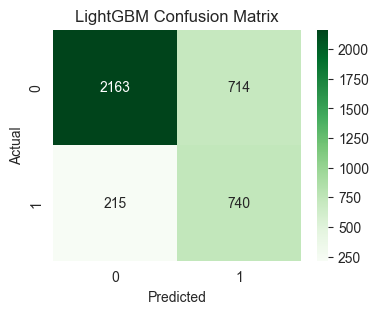

In [112]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63]
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize LGBMClassifier
lgbm = LGBMClassifier(random_state=42, class_weight='balanced')

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Best estimator
best_lgbm = grid_search.best_estimator_

# Evaluate on validation set
y_pred_lgbm = best_lgbm.predict(X_val)
y_pred_proba_lgbm = best_lgbm.predict_proba(X_val)[:, 1]

print("LightGBM Best Params:", grid_search.best_params_)
print("LightGBM Accuracy:", accuracy_score(y_val, y_pred_lgbm))
print("LightGBM ROC AUC:", roc_auc_score(y_val, y_pred_proba_lgbm))
print("LightGBM Classification Report:\n", classification_report(y_val, y_pred_lgbm))

# Print and plot confusion matrix
cm_lgbm = confusion_matrix(y_val, y_pred_lgbm)
print("LightGBM Confusion Matrix:\n", cm_lgbm)
plt.figure(figsize=(4,3))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Greens')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

joblib.dump(best_lgbm, 'pkl_models/lightgbm_model.pkl')
# Save results for comparison
results['LightGBM'] = {
    'accuracy': accuracy_score(y_val, y_pred_lgbm),
    'roc_auc': roc_auc_score(y_val, y_pred_proba_lgbm),
    'classification_report': classification_report(y_val, y_pred_lgbm, output_dict=True),
    'confusion_matrix': cm_lgbm,
    'best_params': grid_search.best_params_
}

Logistic Regression Accuracy: 0.7077244258872651
Logistic Regression ROC AUC: 0.7417070210206604
Logistic Regression Confusion Matrix:
 [[2080  797]
 [ 323  632]]


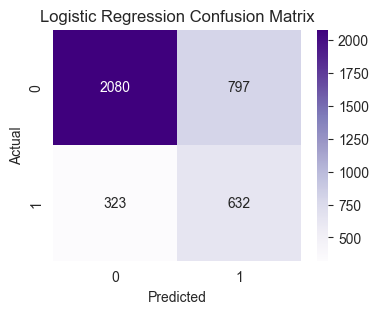

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
y_pred_proba_logreg = logreg.predict_proba(X_val)[:, 1]
cm_logreg = confusion_matrix(y_val, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_logreg))
print("Logistic Regression ROC AUC:", roc_auc_score(y_val, y_pred_proba_logreg))
print("Logistic Regression Confusion Matrix:\n", cm_logreg)
plt.figure(figsize=(4,3))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Purples')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

joblib.dump(logreg, 'pkl_models/logistic_model.pkl')

results['LogisticRegression'] = {
    'accuracy': accuracy_score(y_val, y_pred_logreg),
    'roc_auc': roc_auc_score(y_val, y_pred_proba_logreg),
    'classification_report': classification_report(y_val, y_pred_logreg, output_dict=True),
    'confusion_matrix': cm_logreg
}

SVC Accuracy: 0.7296450939457203
SVC ROC AUC: 0.7651498525041537
SVC Confusion Matrix:
 [[2141  736]
 [ 300  655]]


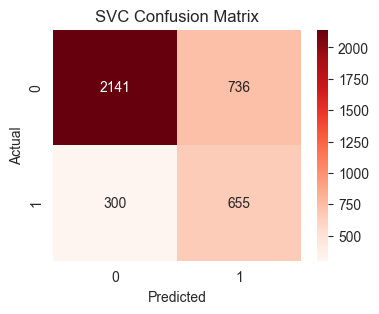

In [114]:
# Support Vector Machine (SVC with probability=True)
svc = SVC(probability=True, class_weight='balanced', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)
y_pred_proba_svc = svc.predict_proba(X_val)[:, 1]
cm_svc = confusion_matrix(y_val, y_pred_svc)
print("SVC Accuracy:", accuracy_score(y_val, y_pred_svc))
print("SVC ROC AUC:", roc_auc_score(y_val, y_pred_proba_svc))
print("SVC Confusion Matrix:\n", cm_svc)
plt.figure(figsize=(4,3))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Reds')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
results['SVC'] = {
    'accuracy': accuracy_score(y_val, y_pred_svc),
    'roc_auc': roc_auc_score(y_val, y_pred_proba_svc),
    'classification_report': classification_report(y_val, y_pred_svc, output_dict=True),
    'confusion_matrix': cm_svc
}

Neural Network (MLP) Accuracy: 0.7635699373695198
Neural Network (MLP) ROC AUC: 0.760301870585816
Neural Network (MLP) Confusion Matrix:
 [[2555  322]
 [ 584  371]]


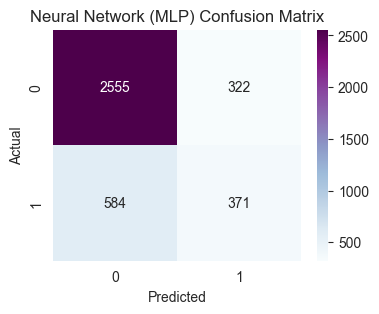

In [115]:
# Neural Network (MLPClassifier)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_val)
y_pred_proba_mlp = mlp.predict_proba(X_val)[:, 1]
cm_mlp = confusion_matrix(y_val, y_pred_mlp)
print("Neural Network (MLP) Accuracy:", accuracy_score(y_val, y_pred_mlp))
print("Neural Network (MLP) ROC AUC:", roc_auc_score(y_val, y_pred_proba_mlp))
print("Neural Network (MLP) Confusion Matrix:\n", cm_mlp)
plt.figure(figsize=(4,3))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='BuPu')
plt.title('Neural Network (MLP) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
joblib.dump(mlp, 'pkl_models/mlp_model.pkl')
results['NeuralNetwork'] = {
    'accuracy': accuracy_score(y_val, y_pred_mlp),
    'roc_auc': roc_auc_score(y_val, y_pred_proba_mlp),
    'classification_report': classification_report(y_val, y_pred_mlp, output_dict=True),
    'confusion_matrix': cm_mlp
}

=== Model Ranking by ROC AUC ===
                Model  Accuracy   ROC_AUC
0            LightGBM  0.757568  0.801730
1             XGBoost  0.777923  0.787323
2        RandomForest  0.770094  0.776618
3                 SVC  0.729645  0.765150
4       NeuralNetwork  0.763570  0.760302
5  LogisticRegression  0.707724  0.741707


C:\Users\Ali Madian\AppData\Local\Temp\ipykernel_14324\3121822473.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC_AUC', y='Model', data=report_df, palette='viridis')


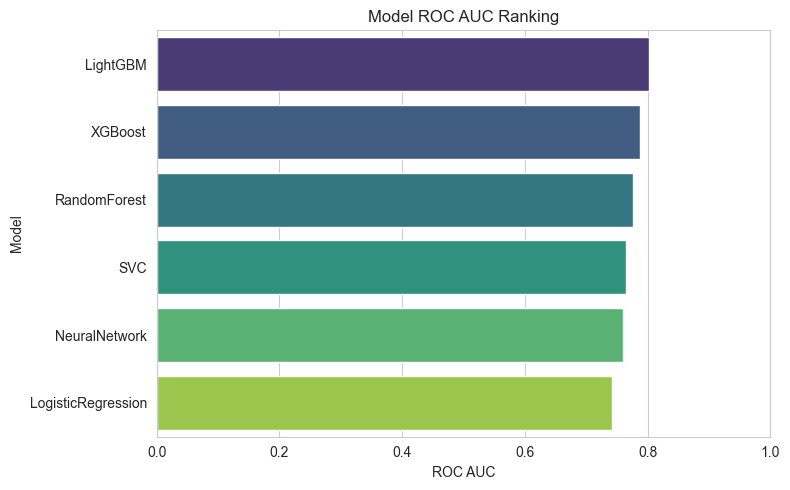

C:\Users\Ali Madian\AppData\Local\Temp\ipykernel_14324\3121822473.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=report_df, palette='magma')


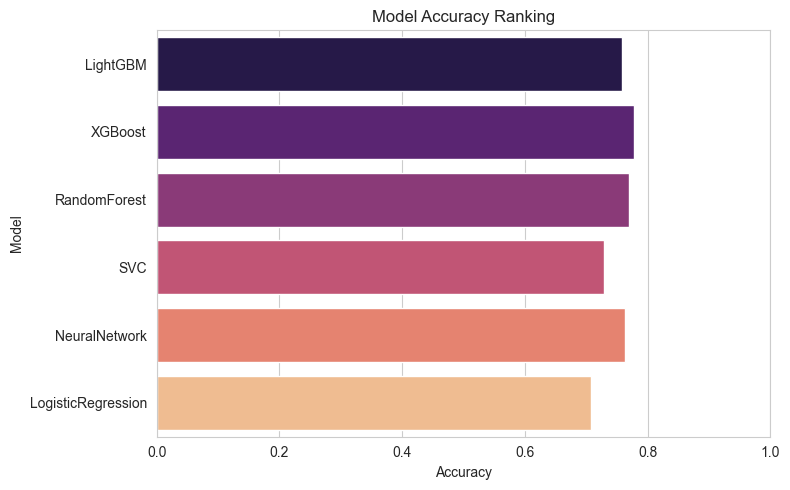


=== Detailed Evaluation Reports ===

--- LightGBM ---
Accuracy: 0.7576
ROC AUC: 0.8017
Classification Report:
              precision    recall  f1-score      support
0.0            0.909588  0.751825  0.823216  2877.000000
1.0            0.508941  0.774869  0.614363   955.000000
accuracy       0.757568  0.757568  0.757568     0.757568
macro avg      0.709264  0.763347  0.718789  3832.000000
weighted avg   0.809740  0.757568  0.771166  3832.000000
Confusion Matrix:
[[2163  714]
 [ 215  740]]
Best Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'num_leaves': 15}

--- XGBoost ---
Accuracy: 0.7779
ROC AUC: 0.7873
Classification Report:
              precision    recall  f1-score      support
0.0            0.829538  0.886340  0.856999  2877.000000
1.0            0.568602  0.451309  0.503211   955.000000
accuracy       0.777923  0.777923  0.777923     0.777923
macro avg      0.699070  0.668824  0.680105  3832.000000
weighted avg   0.764508  0.777923  0.768829  3832.00

In [116]:
# --- Model Ranking and Final Evaluation Report with Plots ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect results into a DataFrame for easy ranking
report_rows = []
for model_name, metrics in results.items():
    report_rows.append({
        'Model': model_name,
        'Accuracy': metrics['accuracy'],
        'ROC_AUC': metrics['roc_auc']
    })

report_df = pd.DataFrame(report_rows)
# Rank by ROC_AUC (descending)
report_df = report_df.sort_values(by='ROC_AUC', ascending=False).reset_index(drop=True)

print("=== Model Ranking by ROC AUC ===")
print(report_df)

# Plot ROC AUC for each model
plt.figure(figsize=(8, 5))
sns.barplot(x='ROC_AUC', y='Model', data=report_df, palette='viridis')
plt.title('Model ROC AUC Ranking')
plt.xlabel('ROC AUC')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# Plot Accuracy for each model
plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=report_df, palette='magma')
plt.title('Model Accuracy Ranking')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

print("\n=== Detailed Evaluation Reports ===")
for idx, row in report_df.iterrows():
    model_name = row['Model']
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {results[model_name]['accuracy']:.4f}")
    print(f"ROC AUC: {results[model_name]['roc_auc']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(results[model_name]['classification_report']).T)
    print("Confusion Matrix:")
    print(results[model_name]['confusion_matrix'])
    if 'best_params' in results[model_name]:
        print("Best Params:", results[model_name]['best_params'])